<a href="https://colab.research.google.com/github/leonardoLavagna/Quantum-Machine-Learning/blob/main/Solutions_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carried out exercises from Quantum Machine Learning Notebook 1 

Here are shown my solutions of some exercises from [Quantum Machine Learning Notebook 1](https://github.com/leonardoLavagna/Quantum-Machine-Learning/blob/main/Notebook_1.ipynb).

In [ ]:
# INSTALLATION OF THE REQUIRED LIBRARIES
# Comment/Uncomment the following command(s), if needed

#!pip install qiskit

In [22]:
# IMPORT "QUANTUM" LIBRARIES
"""
  # QuantumCircuit: provides basic circuits and gates
  # assemble: allows to assemble circuits and convert them into "quantum objects"
  # Aer: provides a variety of high performance simulator backends 
  # transpile: allows to compile the programs
  # visualization: contains functions that perform some visualizations 
  # quantum_info Statevector: allows to initialize state vectors
"""

from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector

In [23]:
# IMPORT "CLASSICAL" LIBRARIES

import numpy as np
import numpy.linalg as la
import math

In [24]:
# GLOBAL VARIABLES

# Backend 
sim = Aer.get_backend('aer_simulator') 
# Global number of qubits
N = 1

## Solution of a selection of exercises

**Solution of Exercise 1 .** If $x$ is a binary string we can add a Pauli $X$ gate for every $1$ in $x$. The result is as follows.

In [25]:
# EXAMPLE OF BASIS ENCODING 

# Classical Data
x = '1011'
n = len(x)
qc = QuantumCircuit(n)

# Encoding
for i in range(len(x)):
    if x[i] == '1':
        qc.x(i)
  
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘

**Solution of Exercise 2 .** For the first part we have $(\pi,\pi,\pi)^T\to |000\rangle$. For example $D_1=\pi$ is encodent into $$\cos(\pi)|0\rangle+\sin(\pi)|1\rangle=-1(1,0)^T=-|0\rangle $$ which, due to the equivalence of kets up to phase shift, corresponds to $|0\rangle$. 

In [26]:
# EXAMPLE OF ANGLE ENCODING
# Remark . Here the encoding sends an input feature to an operator (rotation matrix).

# Classical data D=(pi,pi,pi,pi)
D = [math.pi,math.pi,math.pi]
X = np.array(D, dtype=float)
n = 3

# Create a circuit
qc = QuantumCircuit(n)

# Add a layer of rotation gates
for qubit in range(n):
  qc.ry(D[qubit],qubit)

# Encoding
qc.draw()


┌───────┐
q_0: ┤ Ry(π) ├
     ├───────┤
q_1: ┤ Ry(π) ├
     ├───────┤
q_2: ┤ Ry(π) ├
     └───────┘

**Solution of Exercise 3 .** Before the measurement add an $H$ gate.

In [27]:
# MEASURING IN THE "H BASIS"

def H_measurement(qc, qubit, cbit):
    """
    Measure 'qubit' in the new basis, and store the result in 'cbit'

    INPUTS: - qc: quantum circuit
            - qubit: qubit to be measured
            - cbit: qubit with the result

    OUTPUTS: qc: quantum circuit
    """
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

In [28]:
# MEASURING |-> WITH INITIALIZATION |->

initial_state = [1/math.sqrt(2), -1/math.sqrt(2)]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
H_measurement(qc, 0, 0)  
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

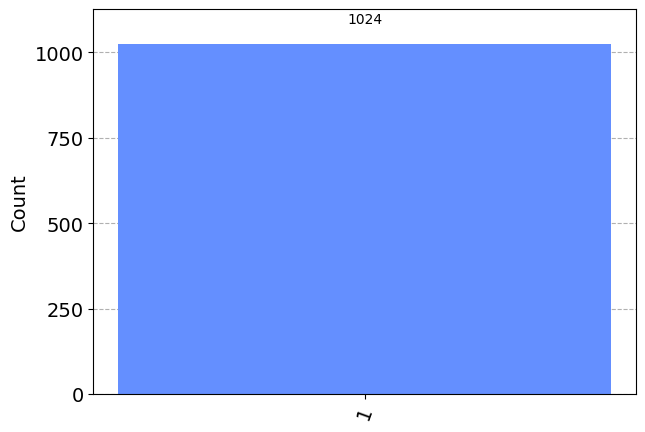

In [29]:
# MEASURING |-> WITH INITIALIZATION |-> CONTINUED

result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

We initialized our qubit in the state $|−\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the state $|1\rangle$. This should be expected since $|-\rangle$ is a basis element. What happens if we initialize our qubit in the state $|+\rangle$ and we want to measure $|-\rangle$ in this new basis? Clearly we get zero. To conclude this exercise lets see, for example, the probability of measuring $|0\rangle$ with initialization $|+\rangle$. To do this we need to write $|0\rangle$ in the new basis, that is as $|0\rangle=\alpha|+\rangle+\beta|-\rangle$. Solving a simple system of equations we get the transformation $|0\rangle \to \frac{\sqrt{2}}{2}(1,1)^T$, so the solution is as follows.

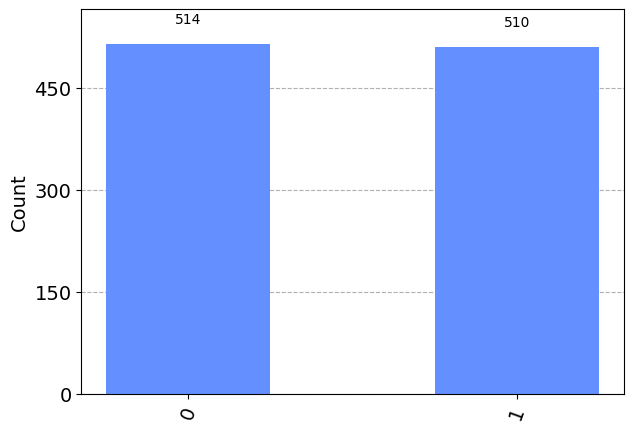

In [30]:
# MEASURING |0> WITH INITIALIZATION |+>
# Remark . Here it is important to avoid the H_measurement 

qc = QuantumCircuit(1,1)
qc.initialize([math.sqrt(2)/2, math.sqrt(2)/2], 0)
qc.measure(0,0)
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

**Solution of Exercise 4 .** Its obvious that each pauli matrix has eigenvalues $\pm 1$, the corresponding normalized eigenvectors are $\frac{1}{\sqrt{2}}(1,\pm 1)^T$ for $\sigma_x$, $\frac{1}{\sqrt{2}}(1,\pm i)^T$ for $\sigma_y$ and $|0\rangle, |1\rangle$ for $\sigma_z$.

**Solution of Exercise 8 .** Quantum gates are always reversible, so we can leverage the basis encoding of the binary variables $a,b, b\oplus f(a)$ where $\oplus$ is the sum modulo $2$. Here, unlike the classical setting, we have an input register for to store $a$ and an output register to store $b$.  With this encoding 
$|a\rangle$ is the input and $|b\rangle, |b\oplus f(a)\rangle$ are the output, so the input register performs $|a\rangle\to |a\rangle$ and the output register performs $|b\rangle\to |b\oplus f(a)\rangle$. The quantum
oracle we wanted is then given by the unitary operator $U_f$ defined
on the tensor product of the hilbert spaces of the inputs and the outputs $\mathbb{H}_{in}\otimes \mathbb{H}_{out}$
which acts as $U_f(|a\rangle\otimes|b\rangle):=|a\rangle \otimes |b\oplus f(a)\rangle$. A pictorial representation of this process is illustrated below. 

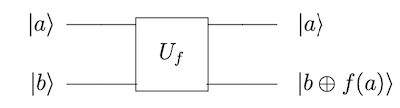

As an example consider the problem: is the function $f:\{0,1\}\to \{0,1\}$ constant? To solve
this simple problem we can use the quantum oracle $U_f$. Indeed by submitting the input
state $|+\rangle \otimes |-\rangle$ we have<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)
$|+\rangle \to \frac{1}{\sqrt{2}}[(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle]$ and $|-\rangle \to |-\rangle$
therefore the state of the first qubit in output is $|+\rangle$ if $f(0)=f(1)$ and is $|-\rangle$ otherwise.

In [31]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [32]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)


In [33]:
# IMPLEMENTATION OF THE QUANTUM ORACLE FOR A NON-CONSTANT FUNCTION
# Remark. The oracle works as U_f(x) = x_0+x_1x_2 mod(2) and from this
# expression we can develop a circuit.

n= 3
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [34]:
# IMPLEMENTATION OF THE INITIALIZATION CIRCUIT
# Remark . Remember that the oracle works with input |+> and output |->.

dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [35]:
# ADD THE ORACLE TO THE INITIALIZATION CIRCUIT
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [36]:
# MEASURE THE COMPLETE CIRCUIT

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

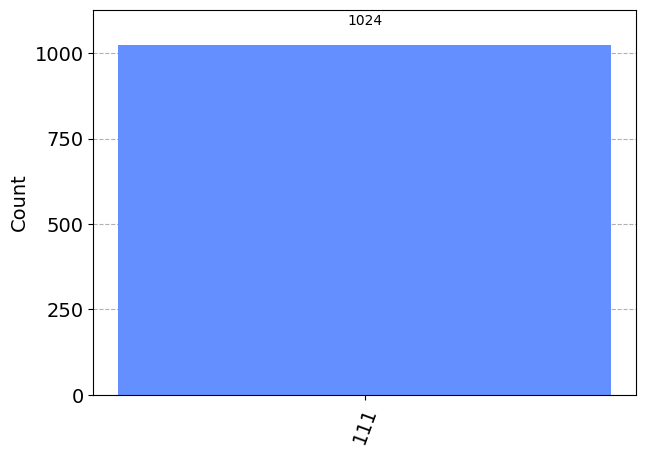

In [37]:
# SIMULATE THE COMPLETE CIRCUIT

result = sim.run(dj_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

We can see from the results above that we have a 0$\%$ chance of measuring 000. This correctly predicts the function is balanced

In [38]:
# IMPLEMENTATION OF THE QUANTUM ORACLE FOR A CONSTANT FUNCTION
# Remark . The input has no effect on the output so we just randomly set 
# the output qubit to be 0 or 1. A circuit can be developed as follows
# if f(x) = 0, then apply the Identity gate to the qubit in register 2.
# if f(x) = 1, then apply the NOT gate to the qubit in register 2

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

At this point one can repeat the steps carried out before with this new oracle and run the complete circuit.

**Remark .** This simple exercise is at the base of an interesting quantum algorithm, the
so called [Deutsch-Jozsa algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html).

**Solution of Exercise 9 .** The requested projector is $$|\psi\rangle\langle \psi |=\begin{pmatrix}|\alpha|^2&\alpha\beta^*\\ \beta\alpha^* & |\beta|^2 \end{pmatrix}\ . $$

**Remark .** The [Krein-Millman theorem](https://en.wikipedia.org/wiki/Krein%E2%80%93Milman_theorem) guarantees that the set of all possible states of a quantum system is convex and its elements are 1-dimentional orthogonal projectors (pure states) and their convex combinations. In general a system will evolve into an incoherent superposition like $\varrho=\lambda_0|0\rangle\langle 0|+\lambda_1|1\rangle\langle 1|$ with $\lambda_0+\lambda_1=1$ and $\lambda_0,\lambda_1\geq 0$. This nehaviour is called *decoherence*. In a quantum computer decoherence happens after a few milliseconds due to the interactions of the physical qubit with the sorrounding environment, and due to noise. This can be a problem, because a pure state will loose its off-the-diagonal elements which in turn means a loss of (quantum) information.

**Solution of Exercise 10 .** For the first part we can write the following scripts.

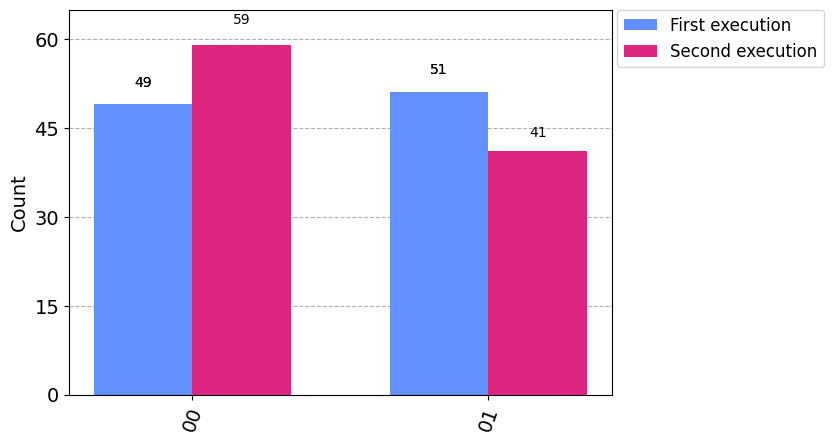

In [39]:
# HISTOGRAM

# Create the circuit
qc = QuantumCircuit(2,2)
qc.h(0)
meas = QuantumCircuit(2,2)
meas.measure([0,1], [0,1])

# First execution
circ = qc.compose(meas)
result = sim.run(transpile(circ, sim), shots=100).result()
counts  = result.get_counts(circ)

# Second execution
second_result = sim.run(transpile(circ, sim), shots=100).result()
second_counts  = second_result.get_counts(circ)

# Results
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

The city plot is a plot of two 3d bar graphs (two dimensional) of the real and imaginary part of a density matrix, so we will need to import both the right visualization and the density matrix module.

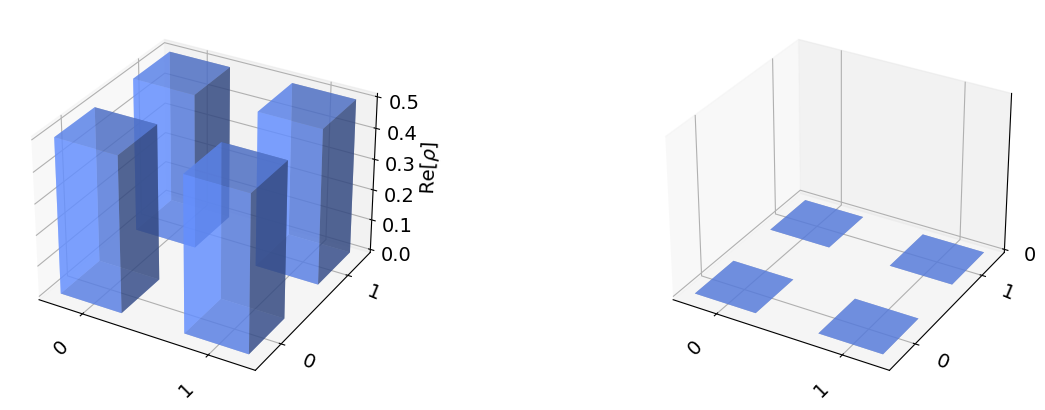

In [40]:
# CITY PLOT

# Needed modules
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

# Create the circuit
qc = QuantumCircuit(N)
qc.h(0)
qc.x(0)

# Create the density matrix
state = DensityMatrix(qc)

# Plot
plot_state_city(state, alpha=0.6)

We can have fun with a more interesting circuit... Also the density matrix module can be avoided and we can just use the `Statevector` method.

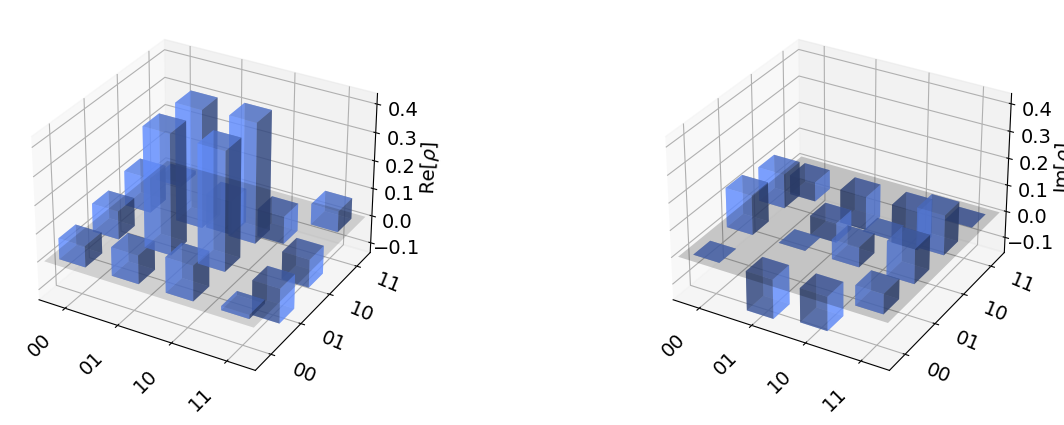

In [41]:
# EXTRA PLOT

# Create the circuit
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)

# Initialization
state = Statevector(qc)

# Plot
plot_state_city(state, alpha=0.6)

## Notes

<a name="cite_note-1"></a>1. [^](#cite_ref-1) The action of $U_f$ on $|+\rangle\otimes|-\rangle=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\otimes\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ is $(x,y\oplus f(x))$ where $x=\frac{|0\rangle+|1\rangle}{\sqrt{2}}$ and $y=\frac{|0\rangle-|1\rangle}{\sqrt{2}}$. If $f(x)=0$ the second qubit is simply $y$ (dropping for now $\frac{1}{\sqrt{2}}$ without loss of generality) so when $f(x)=0$ the action of $U_f$ is $(x,y)\to (x,y)$, that is $|x\rangle(|0\rangle-|1\rangle)\to |x\rangle(|0\rangle-|1\rangle)$. Likewise if $f(x)=1$ we have $(x,y)\to(x,y\oplus 1)$ and $|x\rangle(|0\rangle-|1\rangle)\to |x\rangle(|1\rangle-|0\rangle)$. By examining the outputs we can merge the previous two relations into $(-1)^{f(x)}|x\rangle(|0\rangle-|1\rangle)$. replacing $|x\rangle$ with $|0\rangle+|1\rangle$ we get $(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle$. So the result of the oracle $U_f$ is $$\frac{|0\rangle+|1\rangle}{\sqrt{2}}\otimes\frac{|0\rangle-|1\rangle}{\sqrt{2}}\to\frac{(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle}{\sqrt{2}} \otimes \frac{|0\rangle-|1\rangle}{\sqrt{2}}\ .$$ At this poin we can go through all the possible combinations and compute the superposition of the first qubit for each scenario. For example if $f(0)=0$ and $f(1)=1$ or $f(1)=0$ and $f(0)=1$, we have that the first qubit is $\pm\frac{|0\rangle +|1\rangle}{\sqrt{2}}$ which differ only for the sign, i.e. the states are equivalent since they differ only by a phase shift of $\pi$.